In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart = pd.read_csv("heart-data-discretized.csv")
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0


In [3]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

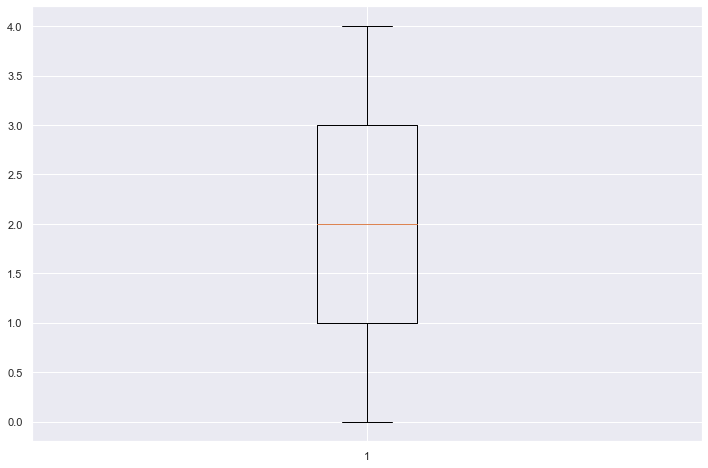

In [4]:
np.random.seed(10)
plot1 = heart['age']
 
fig = plt.figure(figsize =(12, 8))
 
plt.boxplot(plot1)
 
plt.show()

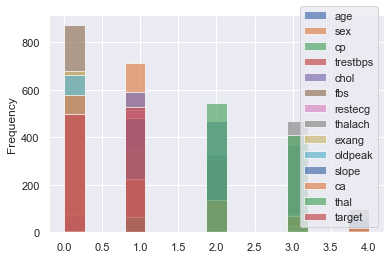

In [5]:
plot2=heart.plot.hist(bins=15,alpha=0.7)
plot2;

<AxesSubplot:ylabel='chol'>

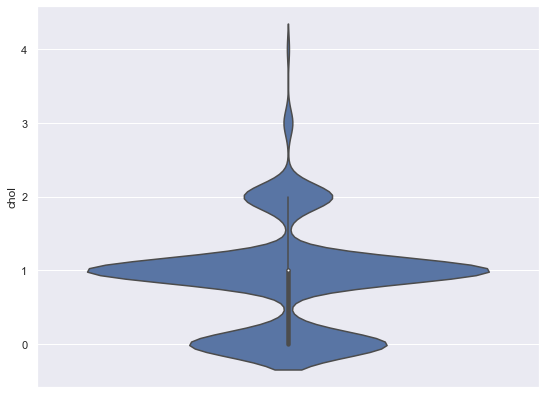

In [6]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = heart["chol"] )

<AxesSubplot:ylabel='thal'>

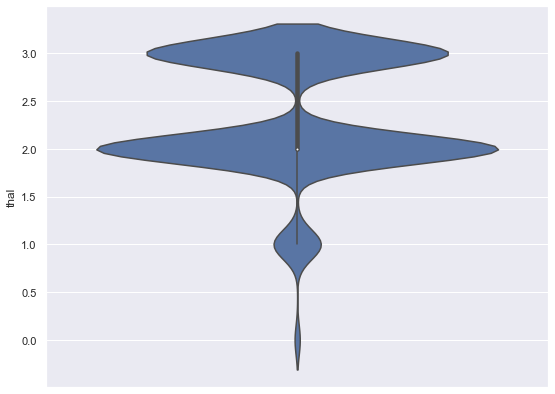

In [7]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = heart["thal"] )

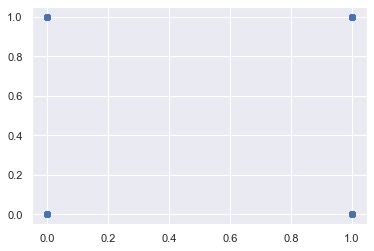

In [8]:
a=heart['sex']
b=heart['exang']
plt.scatter(a,b);

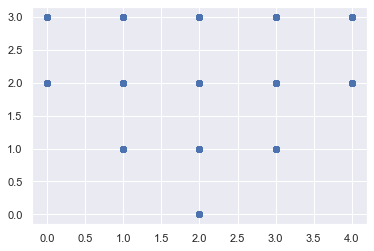

In [9]:
a=heart['age']
b=heart['thal']
plt.scatter(a,b);

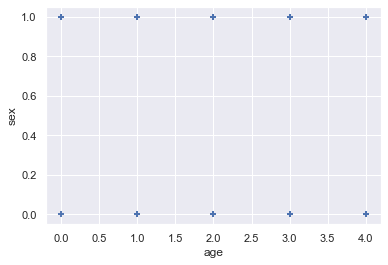

In [10]:
sns.scatterplot(x='age', y='sex', data= heart, marker = '+');

<AxesSubplot:>

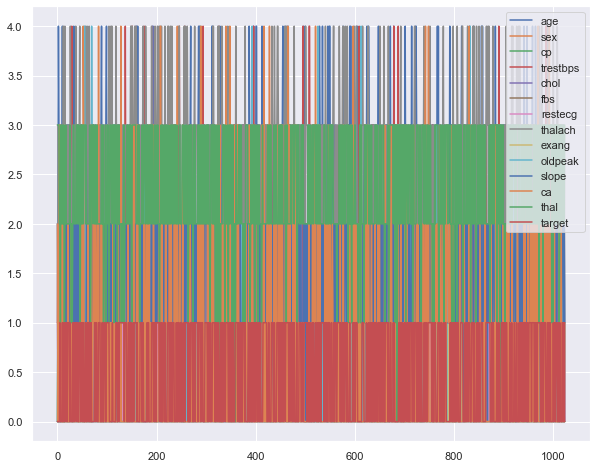

In [11]:
heart.plot(figsize=(10,8))

In [12]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0


In [13]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

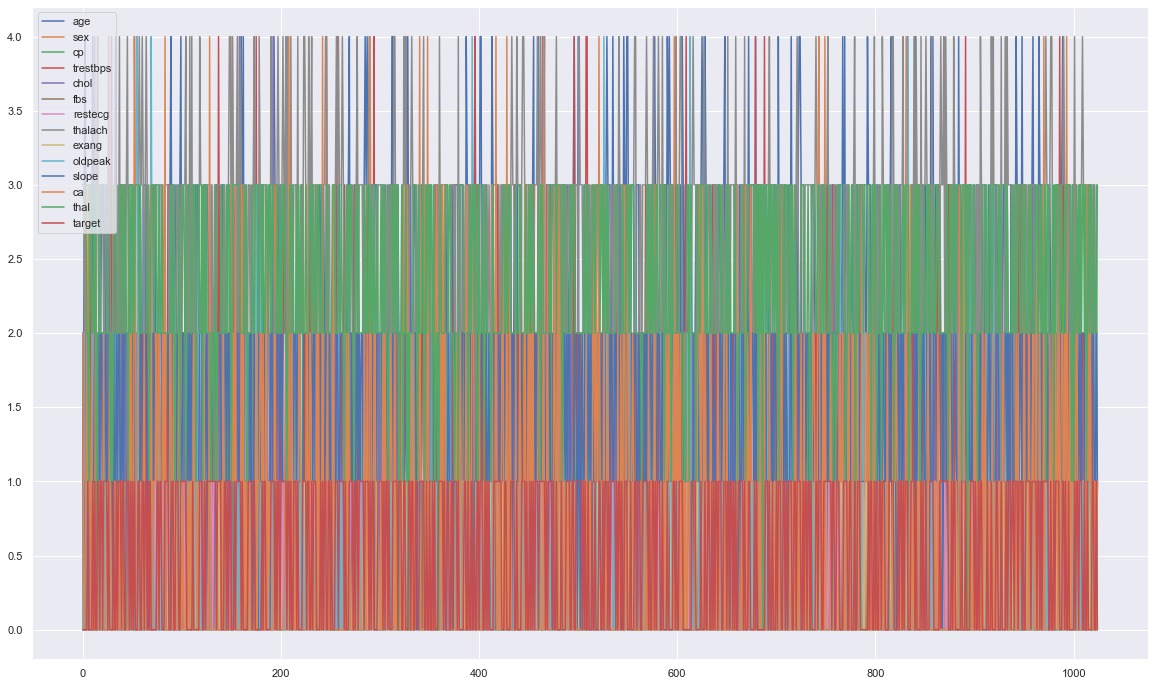

In [14]:
heart.plot(figsize=(20,12))

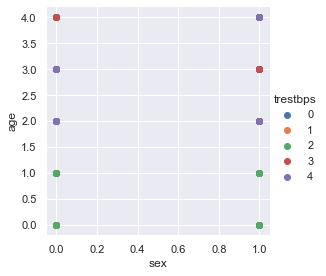

In [15]:
sns.FacetGrid(heart,hue="trestbps",size=4) \
.map(plt.scatter,"sex","age") \
.add_legend()
plt.show()  

## Heatmap

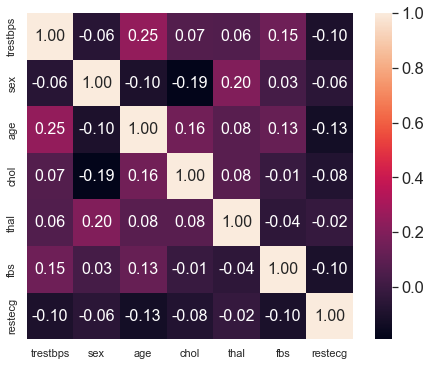

In [16]:
cols = ['trestbps','sex','age','chol','thal','fbs',
        'restecg']
f, ax = plt.subplots(figsize=(8,6))
cm = np.corrcoef(heart[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

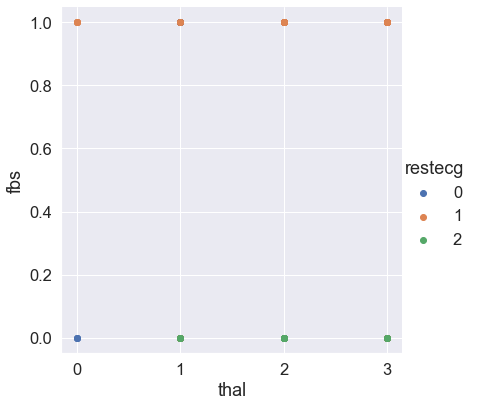

In [17]:
sns.FacetGrid(heart,hue="restecg",size=6) \
.map(plt.scatter,"thal","fbs") \
.add_legend()
plt.show()  

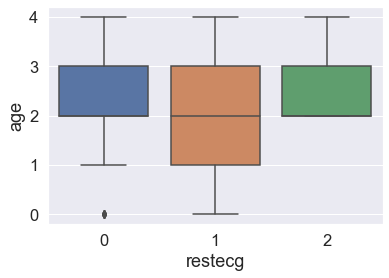

In [18]:
sns.boxplot(x="restecg", y="age", data=heart);

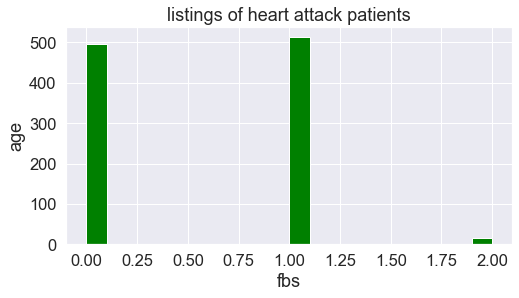

In [19]:
plt.figure(figsize = (8,4)) 
x = heart["restecg"] 
plt.hist(x, bins = 20, color = "green")
plt.title("listings of heart attack patients") 
plt.xlabel("fbs") 
plt.ylabel("age");

## EDA

In [20]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   restecg   1025 non-null   int64
 7   thalach   1025 non-null   int64
 8   exang     1025 non-null   int64
 9   oldpeak   1025 non-null   int64
 10  slope     1025 non-null   int64
 11  ca        1025 non-null   int64
 12  thal      1025 non-null   int64
 13  target    1025 non-null   int64
dtypes: int64(14)
memory usage: 112.2 KB


In [21]:
heart = heart.apply(lambda x: pd.factorize(x)[0])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
2,1,0,0,1,0,0,0,1,1,1,1,1,0,0
3,2,0,0,1,0,0,0,0,0,0,0,2,0,0
4,2,1,0,1,1,1,0,2,0,2,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2,0,1,1,1,0,0,0,1,0,0,1,1,1
1021,2,0,0,0,1,0,1,1,1,1,2,2,0,0
1022,3,0,0,2,1,0,1,2,1,0,2,2,1,0
1023,0,1,0,2,1,0,1,0,0,0,0,1,1,1


## Test and Train

In [22]:
x=heart.drop('target',axis=1)
y = heart[['target']]

In [23]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,1,0,1,1,1,1,0
2,1,0,0,1,0,0,0,1,1,1,1,1,0
3,2,0,0,1,0,0,0,0,0,0,0,2,0
4,2,1,0,1,1,1,0,2,0,2,2,3,1


In [24]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
866,3,0,2,2,1,0,0,3,0,0,0,1,1
749,2,0,1,0,1,0,0,1,0,0,2,4,0
212,0,0,0,1,1,0,1,1,0,1,2,1,0
79,0,0,1,0,0,0,0,0,0,0,0,2,1
148,0,0,3,1,1,1,0,3,0,0,2,1,0


In [28]:
y_train.head()

,target
866,1
749,1
212,0
79,1
148,1


## Task 1a: Discrete Bayesian Networks

In [29]:
from sklearn.naive_bayes import BernoulliNB

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
naive_bayes = BernoulliNB()

In [32]:
naive_bayes.fit(x_test,y_test)

BernoulliNB()

In [33]:
naive_train_bayes = naive_bayes.score(x_train,y_train)
naive_train_bayes

0.8192419825072886

In [34]:
naive_bayes = naive_bayes.predict(x_test)
accuracy_score(y_test,naive_bayes)

0.8082595870206489

## Using the stroke dataset

In [35]:
stroke = pd.read_csv("stroke-data-discretized.csv")
stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,Yes,Private,Urban,4,1,formerly smoked,1
1,Female,3,0,0,Yes,Self-employed,Rural,3,1,never smoked,1
2,Male,4,0,1,Yes,Private,Rural,1,1,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,2,1,smokes,1
4,Female,4,1,0,Yes,Self-employed,Rural,2,0,never smoked,1


In [36]:
stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

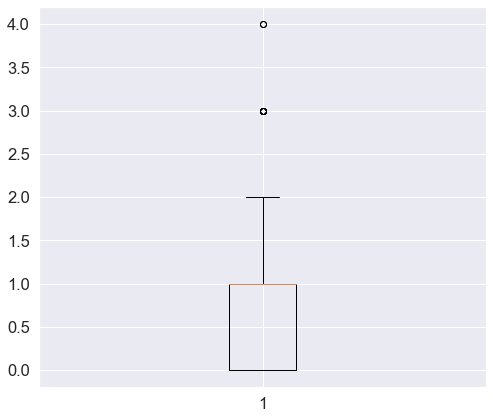

In [37]:
np.random.seed(10)
plot1 = stroke['bmi']
 
fig = plt.figure(figsize =(8, 7))
 
plt.boxplot(plot1)
 
plt.show()

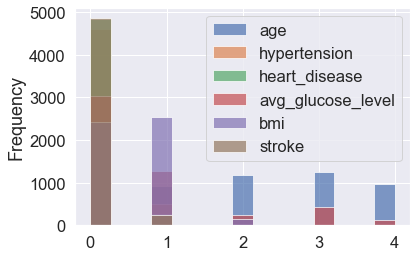

In [38]:
plot2=stroke.plot.hist(bins=15,alpha=0.7)
plot2;

In [39]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,Yes,Private,Urban,4,1,formerly smoked,1
1,Female,3,0,0,Yes,Self-employed,Rural,3,1,never smoked,1
2,Male,4,0,1,Yes,Private,Rural,1,1,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,2,1,smokes,1
4,Female,4,1,0,Yes,Self-employed,Rural,2,0,never smoked,1


In [40]:
stroke[['age']]=stroke[['age']].apply(lambda col:pd.Categorical(col).codes)

In [41]:
stroke[['gender']]=stroke[['gender']].apply(lambda col:pd.Categorical(col).codes)

In [42]:
stroke[['ever_married']]=stroke[['ever_married']].apply(lambda col:pd.Categorical(col).codes)

In [43]:
stroke[['work_type']]=stroke[['work_type']].apply(lambda col:pd.Categorical(col).codes)

In [44]:
stroke[['Residence_type']]=stroke[['Residence_type']].apply(lambda col:pd.Categorical(col).codes)

In [45]:
stroke[['avg_glucose_level']]=stroke[['avg_glucose_level']].apply(lambda col:pd.Categorical(col).codes)

In [46]:
stroke[['bmi']]=stroke[['bmi']].apply(lambda col:pd.Categorical(col).codes)

In [47]:
stroke[['smoking_status']]=stroke[['smoking_status']].apply(lambda col:pd.Categorical(col).codes)

In [48]:
stroke[['stroke']]=stroke[['stroke']].apply(lambda col:pd.Categorical(col).codes)

In [49]:
stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,4,1,1,1
1,0,3,0,0,1,3,0,3,1,2,1
2,1,4,0,1,1,2,0,1,1,2,1
3,0,2,0,0,1,2,1,2,1,3,1
4,0,4,1,0,1,3,0,2,0,2,1


In [50]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:>

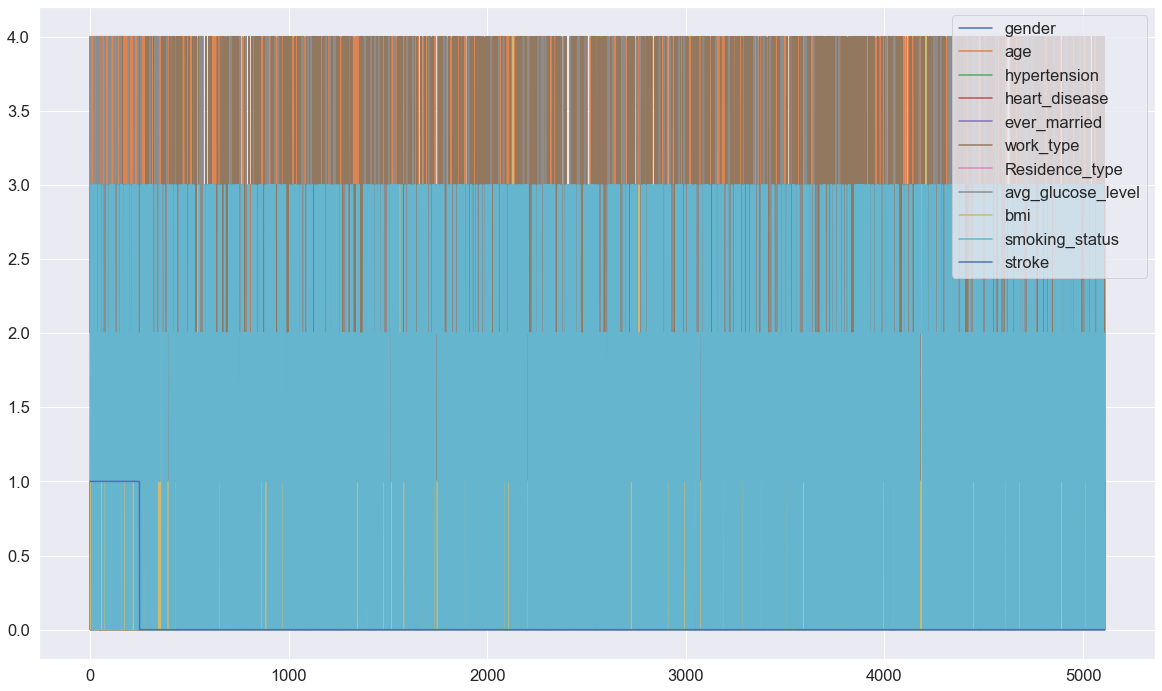

In [51]:
stroke.plot(figsize=(20,12))

## Heatmap

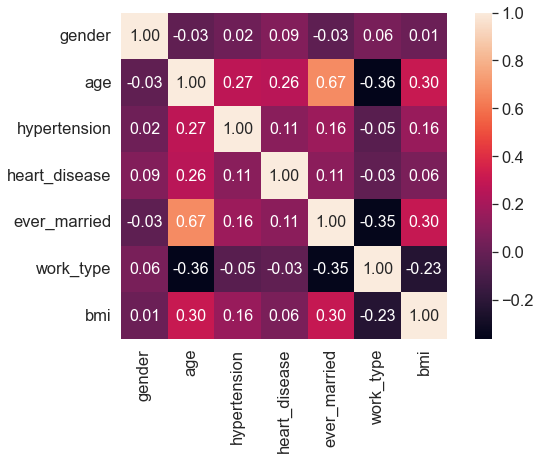

In [52]:
cols = ['gender','age','hypertension','heart_disease','ever_married','work_type',
        'bmi']
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(stroke[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

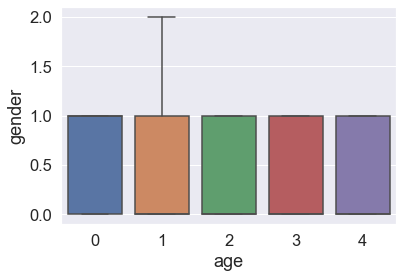

In [53]:
sns.boxplot(x="age", y="gender", data=stroke);

## EDA

In [54]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             5110 non-null   int8 
 1   age                5110 non-null   int8 
 2   hypertension       5110 non-null   int64
 3   heart_disease      5110 non-null   int64
 4   ever_married       5110 non-null   int8 
 5   work_type          5110 non-null   int8 
 6   Residence_type     5110 non-null   int8 
 7   avg_glucose_level  5110 non-null   int8 
 8   bmi                5110 non-null   int8 
 9   smoking_status     5110 non-null   int8 
 10  stroke             5110 non-null   int8 
dtypes: int64(2), int8(9)
memory usage: 124.9 KB


In [55]:
stroke = stroke.apply(lambda x: pd.factorize(x)[0])
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,1,0
2,0,0,0,0,0,0,1,2,0,1,0
3,1,2,0,1,0,0,0,3,0,2,0
4,1,0,1,1,0,1,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,1,0,0,0,4,0,1,1
5106,1,0,0,1,0,1,0,2,0,1,1
5107,1,2,0,1,0,1,1,4,0,1,1
5108,0,1,0,1,0,0,1,3,1,0,1


In [56]:
x=stroke.drop('stroke',axis=1)
y = stroke[['stroke']]

In [57]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,1
2,0,0,0,0,0,0,1,2,0,1
3,1,2,0,1,0,0,0,3,0,2
4,1,0,1,1,0,1,1,3,1,1


In [58]:
y.head()

,stroke
0,0
1,0
2,0
3,0
4,0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [61]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3378,0,1,0,1,1,1,1,1,0,1
479,0,1,1,1,0,0,1,1,0,2
3683,0,0,0,0,0,1,1,4,0,3
2997,0,0,0,0,0,0,0,1,0,0
286,1,4,0,1,1,0,0,4,0,1


In [62]:
y_train.head()

,stroke
3378,1
479,1
3683,1
2997,1
286,1


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
RandomForest = RandomForestClassifier()

In [66]:
RandomForest.fit(x_train, y_train)

RandomForestClassifier()

In [67]:
y_pred = RandomForest.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9365737996443391

In [69]:
confusion_matrix(y_test, y_pred)

array([[   5,   91],
       [  16, 1575]], dtype=int64)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.05      0.09        96
           1       0.95      0.99      0.97      1591

    accuracy                           0.94      1687
   macro avg       0.59      0.52      0.53      1687
weighted avg       0.91      0.94      0.92      1687



## Task 1c: Gaussian Discrete Bayesian Networks

In [71]:
from sklearn.naive_bayes import BernoulliNB

In [72]:
naive_bayes = BernoulliNB()

In [73]:
naive_bayes.fit(x_test,y_test)

BernoulliNB()

In [74]:
naive_train_bayes = naive_bayes.score(x_train,y_train)
naive_train_bayes

0.9295939234589541

In [75]:
naive_bayes = naive_bayes.predict(x_test)
accuracy_score(y_test,naive_bayes)

0.9318316538233551

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.05      0.09        96
           1       0.95      0.99      0.97      1591

    accuracy                           0.94      1687
   macro avg       0.59      0.52      0.53      1687
weighted avg       0.91      0.94      0.92      1687



## Task 1b: Comparison of Inference and Structure Learning Algorithms

## Rejection Sampling

In [77]:
from math import sqrt

In [78]:
np.random.randn(1000)

array([-0.80459114, -0.21269764, -0.33914025,  0.31216994,  0.56515267,
       -0.14742026, -0.02590534,  0.2890942 , -0.53987907,  0.70816002,
        0.84222474,  0.2035808 ,  2.39470366,  0.91745894, -0.11227247,
       -0.36218045, -0.23218226, -0.5017289 ,  1.12878515, -0.69781003,
       -0.08112218, -0.52929608,  1.04618286, -1.41855603, -0.36249918,
       -0.12190569,  0.31935642,  0.4609029 , -0.21578989,  0.98907246,
        0.31475378,  2.46765106, -1.50832149,  0.62060066, -1.04513254,
       -0.79800882,  1.98508459,  1.74481415, -1.85618548, -0.2227737 ,
       -0.06584785, -2.13171211, -0.04883051,  0.39334122,  0.21726515,
       -1.99439377,  1.10770823,  0.24454398, -0.06191203, -0.75389296,
        0.71195902,  0.91826915, -0.48209314,  0.08958761,  0.82699862,
       -1.95451212,  0.11747566, -1.90745689, -0.92290926,  0.46975143,
       -0.14436676, -0.40013835, -0.29598385,  0.84820861,  0.70683045,
       -0.78726893,  0.29294072, -0.47080725,  2.40432561, -0.73

In [79]:
f=lambda x: np.exp(-(x**2)/2)/(sqrt(2*3.14))

In [80]:
M=0.3 #scale factor
M
u1=np.random.rand(10000)*3  
u2=np.random.rand(10000)   
idx,=np.where(u2<=f(u1)/M)

In [81]:
data=u1[idx]
data

array([1.11160537, 0.91905102, 0.00857917, ..., 1.30395043, 0.33573289,
       2.02368005])